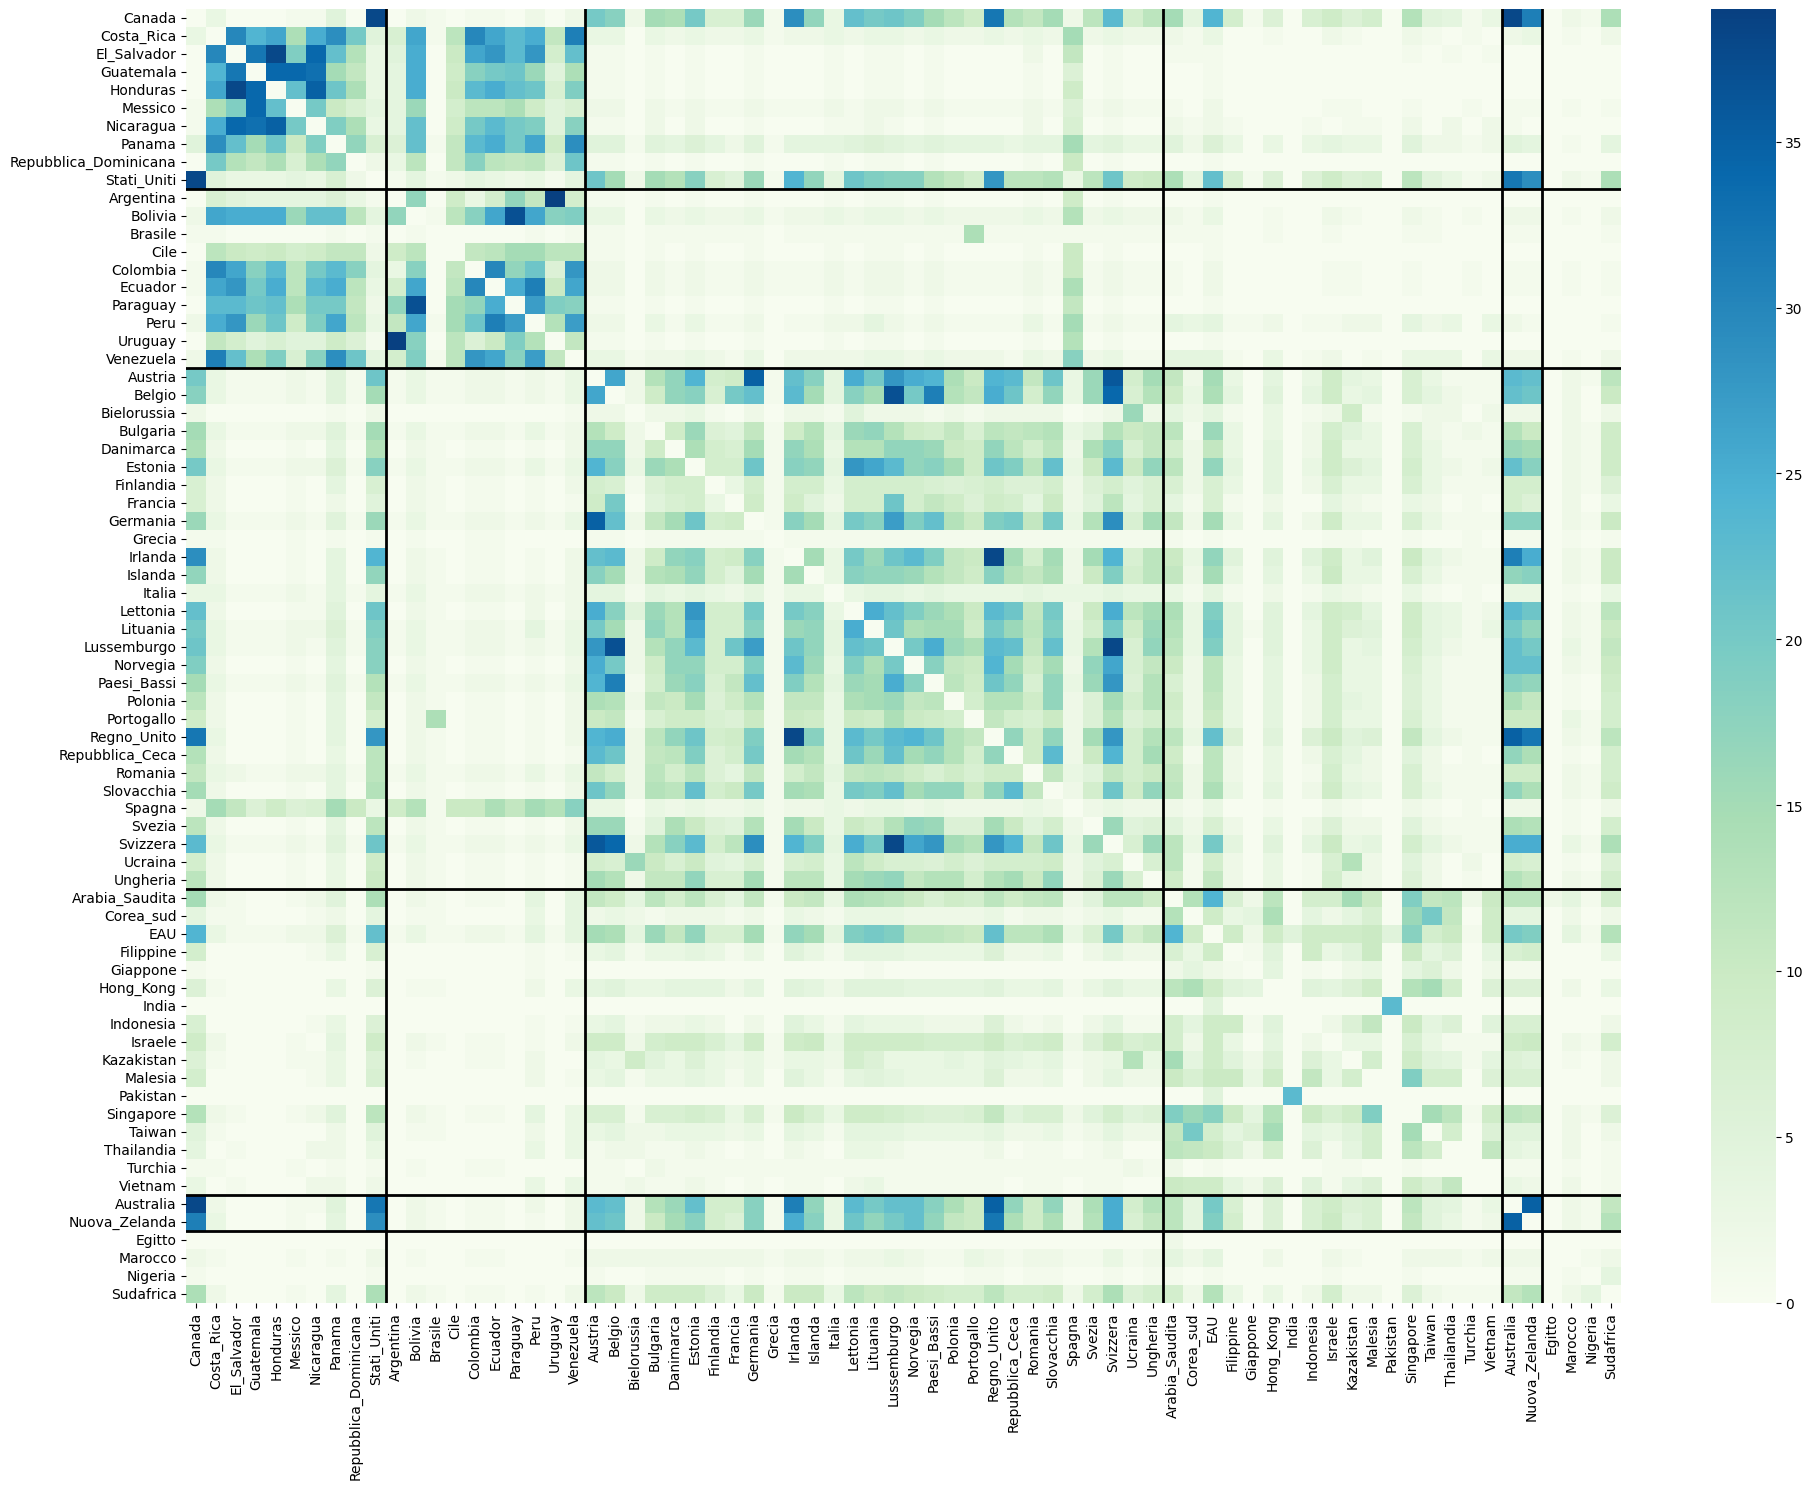

In [8]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Carica il grafo dal file pkl
with open('global1.pkl', 'rb') as f:
    G = pickle.load(f)

# Ottieni una mappa dai nodi alle etichette
labels = nx.get_node_attributes(G, 'label')

# Mappa dei paesi ai continenti
continent_mapping = {
    'Arabia_Saudita': 'Asia',
    'Argentina': 'South America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Belgio': 'Europe',
    'Bielorussia': 'Europe',
    'Bolivia': 'South America',
    'Brasile': 'South America',
    'Bulgaria': 'Europe',
    'Canada': 'North America',
    'Repubblica_Ceca': 'Europe',
    'Cile': 'South America',
    'Colombia': 'South America',
    'Corea_sud': 'Asia',
    'Costa_Rica': 'North America',
    'Danimarca': 'Europe',
    'Ecuador': 'South America',
    'Egitto': 'Africa',
    'El_Salvador': 'North America',
    'EAU': 'Asia',
    'Estonia': 'Europe',
    'Filippine': 'Asia',
    'Finlandia': 'Europe',
    'Francia': 'Europe',
    'Germania': 'Europe',
    'Giappone': 'Asia',
    'Grecia': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Irlanda': 'Europe',
    'Islanda': 'Europe',
    'Israele': 'Asia',
    'Italia': 'Europe',
    'Kazakistan': 'Asia',
    'Lettonia': 'Europe',
    'Lituania': 'Europe',
    'Lussemburgo': 'Europe',
    'Malesia': 'Asia',
    'Marocco': 'Africa',
    'Messico': 'North America',
    'Nicaragua': 'North America',
    'Nigeria': 'Africa',
    'Norvegia': 'Europe',
    'Nuova_Zelanda': 'Oceania',
    'Paesi_Bassi': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Polonia': 'Europe',
    'Portogallo': 'Europe',
    'Hong_Kong': 'Asia',
    'Regno_Unito': 'Europe',
    'Repubblica_Dominicana': 'North America',
    'Romania': 'Europe',
    'Singapore': 'Asia',
    'Slovacchia': 'Europe',
    'Spagna': 'Europe',
    'Stati_Uniti': 'North America',
    'Sudafrica': 'Africa',
    'Svezia': 'Europe',
    'Svizzera': 'Europe',
    'Taiwan': 'Asia',
    'Thailandia': 'Asia',
    'Turchia': 'Asia',
    'Ucraina': 'Europe',
    'Ungheria': 'Europe',
    'Uruguay': 'South America',
    'Venezuela': 'South America',
    'Vietnam': 'Asia'
}
# Funzione per ordinare i paesi
def sort_key(country):
    continent_order = ['North America', 'South America', 'Europe', 'Asia', 'Oceania', 'Africa']
    continent = continent_mapping[country]
    return (continent_order.index(continent), country)

# Ottieni la lista dei nodi e delle etichette
countries = list(G.nodes)
labels_list = [labels[node] for node in countries]

# Ordina le etichette
sorted_labels = sorted(labels_list, key=sort_key)

# Inizializza una matrice vuota con le etichette ordinate
correlation_matrix = pd.DataFrame(0, index=sorted_labels, columns=sorted_labels)

# Riempie la matrice con i pesi degli archi
for u, v, data in G.edges(data=True):
    correlation_matrix.at[labels[u], labels[v]] = data['weight']
    correlation_matrix.at[labels[v], labels[u]] = data['weight']  # Poiché il grafo è non orientato

# Configura le dimensioni della figura, aumentando per fare spazio a tutte le etichette
plt.figure(figsize=(20, 15))

# Crea la heatmap senza annotazioni
# Crea la heatmap senza annotazioni con la mappa dei colori da bianco a rosso
ax = sns.heatmap(correlation_matrix, annot=False, cmap='GnBu', cbar=True)

#ax = sns.heatmap(correlation_matrix, annot=False, cmap='viridis', cbar=True)

# Imposta il titolo e modifica la dimensione del font delle etichette degli assi
#plt.title('Correlazione delle canzoni condivise nelle Top 50 di Spotify', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Aggiungi righe per separare i continenti
continent_boundaries = []
current_continent = continent_mapping[sorted_labels[0]]
for i, label in enumerate(sorted_labels):
    if continent_mapping[label] != current_continent:
        continent_boundaries.append(i)
        current_continent = continent_mapping[label]

for boundary in continent_boundaries:
    ax.axhline(boundary, color='black', lw=2)
    ax.axvline(boundary, color='black', lw=2)

# Aggiungi spaziature per evitare sovrapposizioni
plt.tight_layout()

# Mostra la mappa
plt.show()
